In [1]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kyochon_=openpyxl.load_workbook('kyochon.xlsx')
goobnae_=openpyxl.load_workbook('goobnae.xlsx')
naenae_=openpyxl.load_workbook('naenae.xlsx')
norang_=openpyxl.load_workbook('norang.xlsx')
zicoba_=openpyxl.load_workbook('zicoba.xlsx')
pericana_=openpyxl.load_workbook('pericana.xlsx')
bbq_=openpyxl.load_workbook('BBQ.xlsx')
bhc_=openpyxl.load_workbook('BHC.xlsx')
cheogotjip_=openpyxl.load_workbook('cheogotjip.xlsx')

In [3]:
# kyochon_=openpyxl.load_workbook('서울_교촌치킨_new_XsideX.xlsx')

In [4]:
def reviewFromXlsx(file):
    file=file.worksheets[0]
    data=[]
    for row in file.rows:
        data.append([row[0].value,row[1].value,row[2].value,row[3].value])
    df=pd.DataFrame(data)
    review=df[1]
    
    return review
    

In [5]:
reviewData=[reviewFromXlsx(kyochon_), reviewFromXlsx(goobnae_), reviewFromXlsx(naenae_), reviewFromXlsx(norang_) \
           , reviewFromXlsx(zicoba_), reviewFromXlsx(pericana_), reviewFromXlsx(bbq_), reviewFromXlsx(bhc_)]

In [6]:
lenData=[len(reviewFromXlsx(kyochon_)), len(reviewFromXlsx(goobnae_)), len(reviewFromXlsx(naenae_)), len(reviewFromXlsx(norang_)) \
           , len(reviewFromXlsx(zicoba_)), len(reviewFromXlsx(pericana_)), len(reviewFromXlsx(bbq_)), len(reviewFromXlsx(bhc_))]

In [7]:
print(lenData)
print(sum(lenData))

[14822, 47416, 20243, 4232, 40221, 1213, 11016, 74859]
214022


In [8]:
dict_spicy=['매콤','맵다','맵싹','매웠','매워','맵고','맵네','맵습','맵긴','맵기','맵더라']
dict_basak=['바삭','겉바속촉','빠삭']#겉바속촉도 단짠처럼 따로 빼야하나?
dict_dambek=['담백']
dict_sweet=['달콤','달달','달짝지근','달고','단맛','달았','달아']#(-)리뷰+달고,달아,달았,..
dict_salty=['짜다','짠맛','짭짤','짜네','짭','짜더라','짰','짜긴','짜고','짭쪼름','짭조름'] #(-)진짜네,진짜다
dict_oily=['느끼']
dict_choc=['촉촉']
dict_sweetsalty=['단짠']
dict_garlic=['갈릭','마늘'] #새로운 제외기준 필요

Dictionary=[dict_spicy, dict_basak, dict_dambek, dict_sweet,dict_salty,dict_oily,dict_choc,dict_sweetsalty,dict_garlic]

In [9]:
print(Dictionary)
len(Dictionary)

[['매콤', '맵다', '맵싹', '매웠', '매워', '맵고', '맵네', '맵습', '맵긴', '맵기', '맵더라'], ['바삭', '겉바속촉', '빠삭'], ['담백'], ['달콤', '달달', '달짝지근', '달고', '단맛', '달았', '달아'], ['짜다', '짠맛', '짭짤', '짜네', '짭', '짜더라', '짰', '짜긴', '짜고', '짭쪼름', '짭조름'], ['느끼'], ['촉촉'], ['단짠'], ['갈릭', '마늘']]


9

In [10]:
count_dict=[0 for i in range(9)]
for brand in range(len(reviewData)):
    print(brand)
    for idxTaste in range(len(Dictionary)):
        words=Dictionary[idxTaste]
        count_per_Taste=0
        
        for idxWord in words:
            boolean_findings=reviewData[brand].str.contains(idxWord)
            count_per_Taste += boolean_findings.sum()

        count_dict[idxTaste]+=count_per_Taste

0
1
2
3
4
5
6
7


In [11]:
print(count_dict)

[7791, 8650, 600, 1774, 2720, 1622, 937, 834, 765]


[7791, 8650, 600, 1774, 2720, 1622, 937, 834]


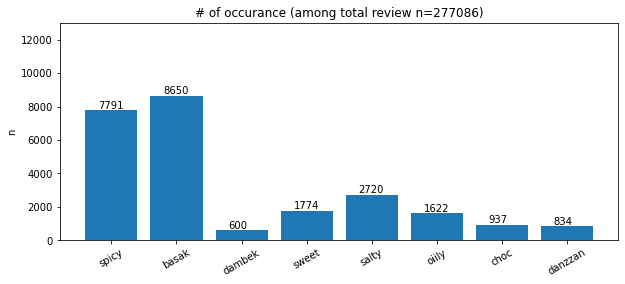

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.2,y[i]+100,y[i])

x=['spicy','basak','dambek','sweet','salty','oiily','choc','danzzan']
y=count_dict[0:8]
print(y)
fig, ax = plt.subplots(figsize=(10,4))
plt.bar(x, y,align='center', width=0.8)
addlabels(x, y)
plt.ylim([0, 13000])
plt.ylabel('n')
plt.title('# of occurance (among total review n=277086)')

for tick in ax.get_xticklabels():
    tick.set_rotation(30)
# plt.xticks(range(0,9), ['spicy','basak','dambek','sweet','salty','oiily','choc','danzzan','garlic'])

# for index, value in enumerate(y):
#     plt.text(value, index, str(value))

In [ ]:
np.std(count_dict)
print(np.mean(count_dict)-3*np.std(count_dict))